# Vehicle Loan Prediction Machine Learning Model

# Chapter 3 - Exploratory Data Analysis

## Lesson 1 - Introduction to EDA



### First things first

Remember to load the libraries and import the cleaned data we created last time

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
loan_df = pd.read_csv('../data/vehicle_loans_clean.csv', index_col='UNIQUEID')

Use the [df.info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function to remind ourselves what variables we are dealing with

In [4]:
#use info to look at cols
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   EMPLOYMENT_TYPE                      233154 non-null  object 
 8   STATE_ID                             233154 non-null  int64  
 9   EMPLOYEE_CODE_ID                     233154 non-null  int64  
 10  MOBILENO_AVL_FLAG                    233154 non-null  int64  
 11  AADHAR_F

- We still have 40 columns
- Our new columns; ‘AGE’, ‘DISBURSAL_MONTH’, ‘AVERAGE_ACCT_AGE_MONTHS’ and ‘CREDIT_HISTORY_LENGTH_MONTHS’ are shown at the bottom of the list
- Start to think about how different columns might be related to both the target variable and each other

### Unique Values 

- A good starting for exploratory analysis is to look at the number of unique values in each column
- Pandas [df.nunique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html) provides a quick and easy way to count column-wise unique values

In [6]:
#investigate unique values
loan_df.nunique()

DISBURSED_AMOUNT                       24565
ASSET_COST                             46252
LTV                                     6579
BRANCH_ID                                 82
SUPPLIER_ID                             2953
MANUFACTURER_ID                           11
CURRENT_PINCODE_ID                      6698
EMPLOYMENT_TYPE                            3
STATE_ID                                  22
EMPLOYEE_CODE_ID                        3270
MOBILENO_AVL_FLAG                          1
AADHAR_FLAG                                2
PAN_FLAG                                   2
VOTERID_FLAG                               2
DRIVING_FLAG                               2
PASSPORT_FLAG                              2
PERFORM_CNS_SCORE                        573
PERFORM_CNS_SCORE_DESCRIPTION             20
PRI_NO_OF_ACCTS                          108
PRI_ACTIVE_ACCTS                          40
PRI_OVERDUE_ACCTS                         22
PRI_CURRENT_BALANCE                    71341
PRI_SANCTI

Do you notice anything interesting?
- MOBILE_AVL_FLAG has only one unique value! 

Let's look in more detail to be sure 

In [8]:
#use value counts to look at MOBILE_AVL_FLAG
loan_df['MOBILENO_AVL_FLAG'].value_counts()

1    233154
Name: MOBILENO_AVL_FLAG, dtype: int64

- Every row contains the value 1 
- It has no predictive value so we can drop it

In [11]:
#drop MOBILE_AVL_FLAG
loan_df = loan_df.drop(['MOBILENO_AVL_FLAG'], axis = 1)

## Lesson 2 -  Whats in the IDs?

Since they are near the top of our list of columns, let's take a look at the 6 Id fields.

- BRANCH_ID: Branch where the loan was disbursed
- SUPPLIER_ID: Vehicle Dealer where the loan was disbursed 
- MANUFACTURER_ID: Vehicle manufacturer(Hero, Honda, TVS etc.)
- CURRENT_PINCODE_ID: Current pincode of the customer
- STATE_ID: State of disbursement
- EMPLOYEE_CODE_ID: Employee of the organization who logged the disbursement

In [12]:
#Sample the Id columns
loan_df[['BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID', 'EMPLOYEE_CODE_ID']].sample(10)

,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID
UNIQUEID,,,,,,
644598,29,15406,48,5867,3,1378
419347,13,14614,86,4611,8,1867
645456,2,24487,86,1651,4,2601
624311,29,15410,49,5861,3,1936
600118,8,12878,48,5281,3,1141
629094,1,18565,48,5096,3,877
499689,11,23707,51,5998,3,2738
516626,34,21156,86,1027,6,9
513973,248,23396,86,1776,4,2482


These six fields contain numeric data, but really they represent categorical, underordered information. For example, we cannot say things like manufacturer id 1 < 2, or state id 1 = 3 - 2. 

Id fields with large numbers of unique values will introduce complexity into our predictive model

In [14]:
#drop SUPPLIER_ID, CURRENT_PINCODE_ID, EMPLOYEE_CODE_ID, BRANCH_ID
loan_df = loan_df.drop(['SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'BRANCH_ID'], axis =1)

### A Closer Look 

### EXERCISE 

- Pick one of the two remaining Id columns and write some code to investigate its unique values
- HINT: We did this with ‘LOAN_DEFAULT’ in chapter 2


### SOLUTION

4     44870
3     34078
6     33505
13    17884
9     16022
8     14197
5     10177
14     9414
1      8936
7      6786
11     6721
18     5412
15     5049
12     4210
2      4160
17     3991
10     3605
16     2685
19     1035
20      185
21      156
22       76
Name: STATE_ID, dtype: int64
4     0.192448
3     0.146161
6     0.143703
13    0.076705
9     0.068719
8     0.060891
5     0.043649
14    0.040377
1     0.038327
7     0.029105
11    0.028826
18    0.023212
15    0.021655
12    0.018057
2     0.017842
17    0.017117
10    0.015462
16    0.011516
19    0.004439
20    0.000793
21    0.000669
22    0.000326
Name: STATE_ID, dtype: float64


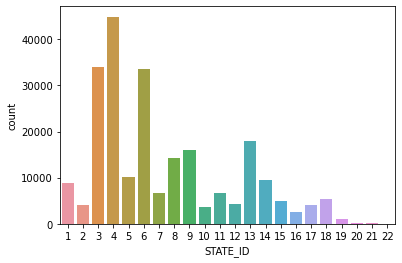

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: MANUFACTURER_ID, dtype: int64
86     0.469792
45     0.242870
51     0.116678
48     0.071669
49     0.043834
120    0.041423
67     0.010315
145    0.003337
153    0.000051
152    0.000026
156    0.000004
Name: MANUFACTURER_ID, dtype: float64


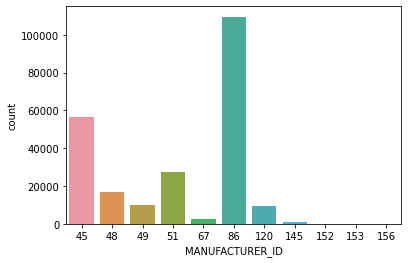

In [19]:
# type solution here
print(loan_df['STATE_ID'].value_counts())
print(loan_df['STATE_ID'].value_counts(normalize=True))
sns.countplot(x='STATE_ID', data=loan_df)
plt.show()

print(loan_df['MANUFACTURER_ID'].value_counts())
print(loan_df['MANUFACTURER_ID'].value_counts(normalize=True))
sns.countplot(x='MANUFACTURER_ID', data=loan_df)
plt.show()


### Dig a little deeper

- It is important to understand how a particular variable is spread 
- However, we are really interested in its relationship to the target variable!

### Group By

- Pandas provides a very useful [df.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function which can be used to group DataFrame rows according to a single column or group of columns
- Similar to the GROUP BY statement in SQL
- Returns a group by object on which we can perform aggregations such as sum, min and max
- We can select subsets of columns to interrogate the data further

### Group by examples

In [21]:
#group by MANUFACTURER_ID
loan_df.groupby('MANUFACTURER_ID')

- Pure output of groupby not that useful
- Let’s try an aggregation

In [22]:
#max groupby MANUFACTURER_ID
loan_df.groupby('MANUFACTURER_ID').max()

,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_MONTH,AVERAGE_ACCT_AGE_MONTH,CREDIT_HISTORY_LENGTH_MONTHS
MANUFACTURER_ID,,,,,,,,,,,,,,,,,,,,,
45,105768,123865,95.00,Self employed,22,1,1,1,1,1,...,15019914,1814000,35,11,23,1,64,12,197,423
48,167447,219140,85.00,Self employed,20,1,1,1,1,1,...,25642806,4170901,20,7,13,1,63,12,192,306
49,332045,459625,89.95,Self employed,20,1,1,1,1,1,...,3750505,289051,12,7,19,1,63,12,195,355
51,191392,286350,90.00,Self employed,22,1,1,1,1,1,...,11305579,1589946,21,7,19,1,69,12,185,468
67,190887,260715,89.99,Self employed,21,1,1,1,1,1,...,2658172,239822,13,5,8,1,63,12,214,239
86,166972,237534,95.00,Self employed,22,1,1,1,1,1,...,20766553,3246710,28,20,36,1,64,12,369,449
120,117227,150113,90.00,Self employed,21,1,1,1,1,1,...,6274520,430379,17,12,11,1,63,12,182,306
145,96899,131000,84.94,Self employed,17,1,1,1,1,1,...,684178,20211,11,11,11,1,61,12,161,307
152,990572,1628992,84.79,Self employed,9,1,1,0,0,0,...,45117,0,3,0,2,0,44,10,70,122


- Ok, now we can see the max value for each column for every ‘MANUFACTURER_ID’
- We can select subsets of the groups and perform operations on them


In [23]:
#group by MANUFACTURER_ID and get LOAN_DEFAULT
loan_df.groupby('MANUFACTURER_ID')['LOAN_DEFAULT'].value_counts()

MANUFACTURER_ID  LOAN_DEFAULT
45               0               43687
                 1               12939
48               0               12156
                 1                4554
49               0                7984
                 1                2236
51               0               21547
                 1                5657
67               0                1882
                 1                 523
86               0               87124
                 1               22410
120              0                7526
                 1                2132
145              0                 622
                 1                 156
152              0                   6
153              0                   8
                 1                   4
156              0                   1
Name: LOAN_DEFAULT, dtype: int64

We can also use [unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html), to give a more readable output

- [unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html) let's us pivot the output of our groupby to give us columns for the unique values of loan default
- The level parameter is used to set the column on which to pivot. In our case want to use the LOAN_DEFAULT column which is the last labelled column in our output, so we set level to -1 to indicate we want to pivot on the last column 

In [25]:
#unstack to get more readable groupings
loan_df.groupby('MANUFACTURER_ID')['LOAN_DEFAULT'].value_counts().unstack(level=-1)

LOAN_DEFAULT,0,1
MANUFACTURER_ID,,
45,43687.0,12939.0
48,12156.0,4554.0
49,7984.0,2236.0
51,21547.0,5657.0
67,1882.0,523.0
86,87124.0,22410.0
120,7526.0,2132.0
145,622.0,156.0
152,6.0,NaN


### Visualized Groupings

- Now we can start to see how loan defaults are distributed within manufacturer groups
- Remember the normalize parameter from value_counts?

In [26]:
#normalize groupby MANUFACTURER_ID
loan_df.groupby('MANUFACTURER_ID')['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1)

LOAN_DEFAULT,0,1
MANUFACTURER_ID,,
45,0.771501,0.228499
48,0.727469,0.272531
49,0.781213,0.218787
51,0.792053,0.207947
67,0.782536,0.217464
86,0.795406,0.204594
120,0.779250,0.220750
145,0.799486,0.200514
152,1.000000,NaN


- Looks like loans for some manufacturers default at higher rates than others!
- Cars from manufacturer 48 defaulted most frequently. *With the exception of 153 which only had 12 total loans which is not enough data to give us solid insight*
- Seaborn [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) to visualize the groupings
- We are using countplot rather than catplot as it allows us to group together data with the hue parameter
- x parameter is the main x-axis variable 
- hue is the column we want to create sub-groups on

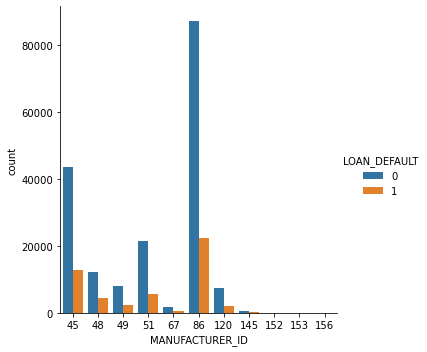

In [27]:
#Plot MANUFACTURER_ID with LOAN_DEFAULT
sns.catplot(data = loan_df, kind = 'count', x = 'MANUFACTURER_ID', hue = 'LOAN_DEFAULT')
plt.show()

## Lesson 3 - Reusable EDA

In the previous lesson, we took a more detailed look at ‘MANUFACTURER_ID’

We still have 4 categorical variables to investigate!
- EMPLOYMENT_TYPE: Employment Type of the customer
- PERFORM_CNS_SCORE_DESCRIPTION: Bureau score description 
- STATE_ID: State of disbursement 
- DISBURSAL_MONTH: The month in which the loan was disbursed

We could copy and paste our steps from the previous lesson

As a general rule of thumb in programming, we want to avoid repeating ourselves

### EXERCISE 

- Write a function to perform the steps from lesson 2 for any column 
- Use this to explore the remaining categorical variables and think about their relationships with the target 


### SOLUTION

In [28]:
def explore_categorical(col_name):   
    #type solution here
    print("{0} Summary".format(col_name))
    print("\n")

    print("{0} Counts".format(col_name))
    print(loan_df[col_name].value_counts())
    print("\n")

    print("{0} Ratio".format(col_name))
    print(loan_df[col_name].value_counts(normalize=True))
    print("\n")

    print("{0} Default Counts".format(col_name))
    print(loan_df.groupby(col_name)['LOAN_DEFAULT'].value_counts().unstack(level=-1))
    print("\n")

    print("{0} Default Ratio".format(col_name))
    print(loan_df.groupby(col_name)['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1))
    print("\n")

    sns.catplot(data=loan_df,kind='count',x=col_name,hue='LOAN_DEFAULT')
    plt.show()

Lets our explore_categorical function to look at DISBURSAL_MONTH

DISBURSAL_MONTH Summary


DISBURSAL_MONTH Counts
10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DISBURSAL_MONTH, dtype: int64


DISBURSAL_MONTH Ratio
10    0.364030
8     0.244366
9     0.233507
11    0.028775
6     0.025695
12    0.024074
3     0.022080
4     0.019845
7     0.017799
5     0.012395
1     0.007326
2     0.000107
Name: DISBURSAL_MONTH, dtype: float64


DISBURSAL_MONTH Default Counts
LOAN_DEFAULT         0      1
DISBURSAL_MONTH              
1                 1316    392
2                   23      2
3                 4094   1054
4                 3636    991
5                 2279    611
6                 4697   1294
7                 3222    928
8                44938  12037
9                43910  10533
10               64474  20401
11                5484   1225
12                4470   1143


DISBURSAL_MONTH Default Ratio
LOAN_DEFAULT            0         1
DISBURSA

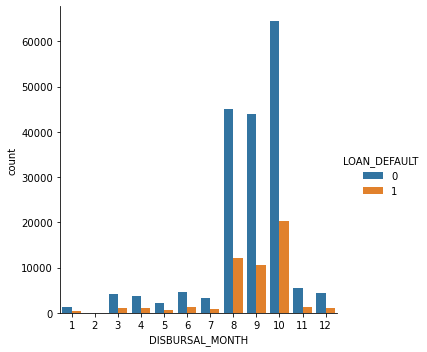

In [29]:
#explore disbursal month
explore_categorical('DISBURSAL_MONTH')

- The vast majority of loans were disbursed in August, September and October 
- Loans disbursed in October had the highest rate of default ~24%

## Lesson 4 - Continuous Variables 

So far in this chapter, we have seen how to investigate categorical data but
we have a number of continuous variables to deal with also!

### Summary Statistics

- The first port of call for exploring continuous variables
- Look at the mean, median, IQR, standard deviation and min/max to get an idea of the range of data and how it is distributed
- Pandas gives us the [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function which generates statistical summaries!

In [30]:
#age summary
loan_df['AGE'].describe()

count    233154.000000
mean         33.902871
std           9.829475
min          17.000000
25%          26.000000
50%          32.000000
75%          41.000000
max          69.000000
Name: AGE, dtype: float64

Some things to note here

- The mean is 33.9
- The medium is 32 (medium is smaller, could the distribution be skewed a little)
- Max is far bigger than 3rd Q, probably has a right tail
- Min of 17 and Max of 69, these are reasonable so no erroneous outliers 

### Box Plots and Distributions

- As with most things, summary statistics are often easier to interpret when visualized
- Luckily, seaborn makes this easy for us with its [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) and [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) functions

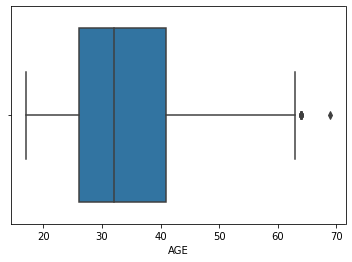

In [32]:
#age boxplot
sns.boxplot(x='AGE', data = loan_df)
plt.show()

As suspected, there is a right tail. Now we can use the [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) function from seaborn to look at the distribution

C:\Users\richard.rodrot\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


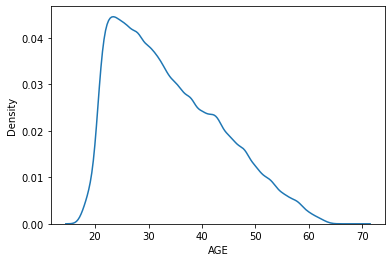

In [33]:
#age distplot
sns.distplot(loan_df['AGE'], hist=False)
plt.show()

### Grouped Summaries

- Just as we did for the categorical variables, we want to explore the relationship between our continuous variables and the LOAN_DEFAULT column
- Remember [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)? We can combine this with the [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function to generate grouped summary statistics!

In [35]:
#age summary grouped by loan_default
loan_df.groupby('LOAN_DEFAULT')['AGE'].describe()

,count,mean,std,min,25%,50%,75%,max
LOAN_DEFAULT,,,,,,,,
0,182543.0,34.090713,9.860825,17.0,26.0,32.0,41.0,69.0
1,50611.0,33.225366,9.685441,17.0,25.0,31.0,40.0,64.0


Ok, looks like the people who defaulted were generally younger. 

We can use sns boxplot to visualize this

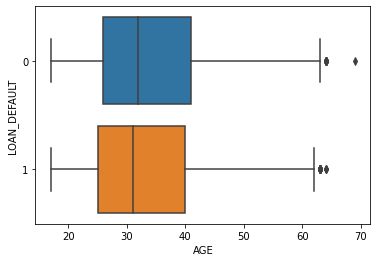

In [36]:
#age boxplot grouped by loan default
sns.boxplot(x='AGE', y='LOAN_DEFAULT', data = loan_df, orient = 'h')
plt.show()

The distribution of AGE within the group of people who defaulted was marginally younger! 

### EXERCISE 

- Using the steps we have performed to explore ‘AGE’, write a function that can be used to explore other continuous variables
- Pick a few more continuous variables to explore and use your function to investigate them!
- Keep a note of your findings

### SOLUTION

In [39]:
def explore_continuous(col_name):
    #type solution here
    print("{0} Summary".format(col_name))
    print("\n")
    print(loan_df[col_name].describe())
    print("\n")

    #Look at boxplot
    sns.boxplot(x=col_name, data=loan_df)
    plt.show()

    #Look at the distribution
    sns.distplot(loan_df[col_name], hist=False)
    plt.show()

    #Now lets look deeper by grouping with the target variable 
    print("{0} Grouped Summary".format(col_name))
    print("\n")
    print(loan_df.groupby('LOAN_DEFAULT')[col_name].describe())

    #look at grouped boxplot 
    sns.boxplot(x=col_name, y='LOAN_DEFAULT', data=loan_df, orient="h")
    plt.show()

Let's use our new function to look at the DISBURSED_AMOUNT column

DISBURSED_AMOUNT Summary


count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64




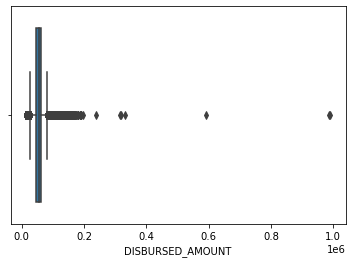

C:\Users\richard.rodrot\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


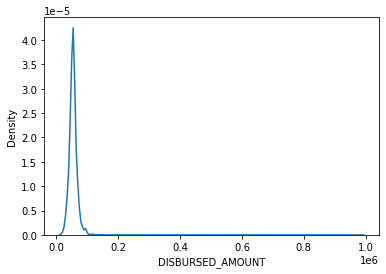

DISBURSED_AMOUNT Grouped Summary


                 count          mean           std      min      25%      50%  \
LOAN_DEFAULT                                                                    
0             182543.0  53826.471111  13140.699007  13320.0  46369.0  53303.0   
1              50611.0  56270.473869  12150.255527  13369.0  49303.0  55459.0   

                  75%       max  
LOAN_DEFAULT                     
0             59947.0  990572.0  
1             61947.0  191392.0  


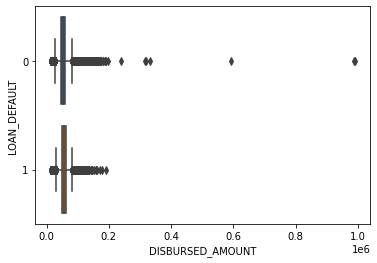

In [40]:
#explore DISBURSED_AMOUNT
explore_continuous('DISBURSED_AMOUNT')

Things to note 

- There are some huge outliers here, we will cover techniques for dealing with them in a later lesson 
- Generally, the disbursed amount for defaulted loans was larger, or at least the distribution ranges over larger values 

## Lesson 5 - Binary Variables & Conclusion

You may have noticed that our data contains several columns with the underscore _FLAG

- MOBILENO_AVL_FLAG: if Mobile no. was shared by the customer then flagged as 1
- AADHAR_FLAG: if aadhar was shared by the customer then flagged as 1
- PAN_FLAG: if pan was shared by the customer then flagged as 1
- VOTERID_FLAG: if voter id was shared by the customer then flagged as 1
- DRIVING_FLAG: if DL was shared by the customer then flagged as 1
- PASSPORT_FLAG: if passport was shared by the customer then flagged as 1

These are binary or boolean fields where a 1 means that some piece of personal information was provided by the customer and 0 means it was not.
We already dropped the MOBILENO_AVL_FLAG because the value was the same for all rows. 

Essentially these columns can be considered as categoricals so we can use our explore_categorical function to look at them!

Let's have a look at 'AADHAR_FLAG'. An AADHAR number is a 12 digit personal id number provided to residents of India by the government

AADHAR_FLAG Summary


AADHAR_FLAG Counts
1    195924
0     37230
Name: AADHAR_FLAG, dtype: int64


AADHAR_FLAG Ratio
1    0.84032
0    0.15968
Name: AADHAR_FLAG, dtype: float64


AADHAR_FLAG Default Counts
LOAN_DEFAULT       0      1
AADHAR_FLAG                
0              27684   9546
1             154859  41065


AADHAR_FLAG Default Ratio
LOAN_DEFAULT         0         1
AADHAR_FLAG                     
0             0.743594  0.256406
1             0.790403  0.209597




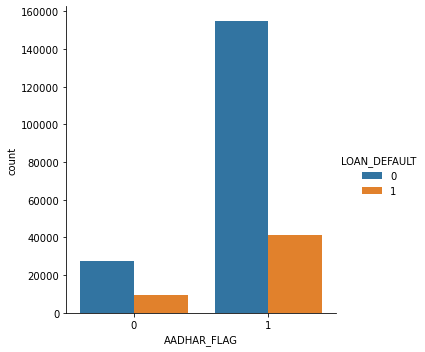

In [41]:
#explore AADHAR_FLAG
explore_categorical('AADHAR_FLAG')

Looks like people who didn't provide their AADHAR number defaulted more frequently at 25.6%!

## Conclusion

- In this chapter, we have demonstrated some techniques to carry out basic exploratory analysis 
- This is only scratching the surface
- Specific techniques used for exploration may be dependent on both the data and its context
- Spend some time now exploring the data further
- Combine these techniques with your own intuition to formulate some hypothesis as to why a particular person might default on their loan
- As always if you have made changes to the data you wish to carry forward, remember to save it!

In [42]:
#save to csv
loan_df.to_csv('../data/vehicle_loans_eda.csv')